<a href="https://colab.research.google.com/github/MiguelAngel-ht/Plots_in_Python-/blob/main/Computer_Performance_Graph_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
list_intel = []
mark = [0,0,0,"o",0,"s",0,"^",0,"+"]

with open("a2_cpu_amd_intel.txt") as file:
    for line in file:
        if not (line[0] == "#" or line[0] == "\n"):
            if line.split()[0] == "Intel" and line.split()[1] == "Core" and "-" in line.split()[2]:
                line = line.split()
                price = line.pop()
                reference = int(line.pop().replace(',', ''))
                web_percentage = line.pop()
                clock_speed = line.pop()
                if "GHz" in clock_speed and price != "NA" and line[2][0] == "i":
                    generation = line[2].replace(line[2][0:3], "")
                    generation = re.sub(r'[a-zA-Z]+', "", generation)
                    if len(generation) == 3 or len(generation) == 4:
                        generation = generation[0:1]
                    elif len(generation) == 5:
                        generation = generation[0:2]
                    dict_intel = {
                                    'Brand': line[0],
                                    'Model': line[1] + ' ' + line[2],
                                    'CPU': line[2][0:2],
                                    'Label': int(line[2][1]),
                                    'Mark' : str(mark[int(line[2][1])]),
                                    'Generation': int(generation),
                                    'Clock speed (GHz)': float(clock_speed.replace("GHz", "")),
                                    'Reference': int(reference),
                                    'Price ($)': float(price.replace("$", "").replace("*", "").replace(",", ""))
                                }
                    list_intel.append(dict_intel)

print(list_intel)

[{'Brand': 'Intel', 'Model': 'Core i9-11900KF', 'CPU': 'i9', 'Label': 9, 'Mark': '+', 'Generation': 11, 'Clock speed (GHz)': 3.5, 'Reference': 3599, 'Price ($)': 499.99}, {'Brand': 'Intel', 'Model': 'Core i9-11900F', 'CPU': 'i9', 'Label': 9, 'Mark': '+', 'Generation': 11, 'Clock speed (GHz)': 2.5, 'Reference': 3537, 'Price ($)': 409.99}, {'Brand': 'Intel', 'Model': 'Core i9-11900K', 'CPU': 'i9', 'Label': 9, 'Mark': '+', 'Generation': 11, 'Clock speed (GHz)': 3.5, 'Reference': 3513, 'Price ($)': 519.99}, {'Brand': 'Intel', 'Model': 'Core i7-11700K', 'CPU': 'i7', 'Label': 7, 'Mark': '^', 'Generation': 11, 'Clock speed (GHz)': 3.6, 'Reference': 3441, 'Price ($)': 349.99}, {'Brand': 'Intel', 'Model': 'Core i9-11900', 'CPU': 'i9', 'Label': 9, 'Mark': '+', 'Generation': 11, 'Clock speed (GHz)': 2.5, 'Reference': 3436, 'Price ($)': 439.99}, {'Brand': 'Intel', 'Model': 'Core i7-11700KF', 'CPU': 'i7', 'Label': 7, 'Mark': '^', 'Generation': 11, 'Clock speed (GHz)': 3.6, 'Reference': 3415, 'Price

In [ ]:
data = pd.DataFrame(list_intel)

In [ ]:
data.head()

,Brand,Model,CPU,Label,Mark,Generation,Clock speed (GHz),Reference,Price ($)
0,Intel,Core i9-11900KF,i9,9,+,11,3.5,3599,499.99
1,Intel,Core i9-11900F,i9,9,+,11,2.5,3537,409.99
2,Intel,Core i9-11900K,i9,9,+,11,3.5,3513,519.99
3,Intel,Core i7-11700K,i7,7,^,11,3.6,3441,349.99
4,Intel,Core i9-11900,i9,9,+,11,2.5,3436,439.99


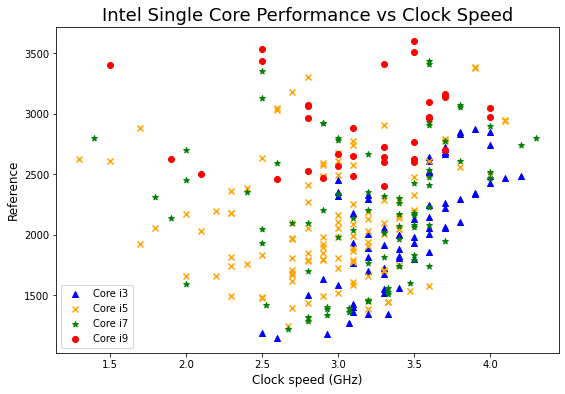

In [ ]:
from numpy.core.fromnumeric import size
marks = ["^","x","*","o"]
color = ['b','orange','g','r']
h=0
plt.figure(figsize=(9,6))
for i in [3,5,7,9]:
  plt.scatter(data = data[data.Label==i],x = 'Clock speed (GHz)', y = 'Reference',
                  c = color[i - 3 - h], cmap = "cool",marker = marks[i - 3 - h], label = 'Core i'+str(i))
  h = h + 1
plt.title("Intel Single Core Performance vs Clock Speed", size=18)
plt.xlabel('Clock speed (GHz)', size=12)
plt.ylabel('Reference', size=12)
plt.legend(loc=3)
plt.show()

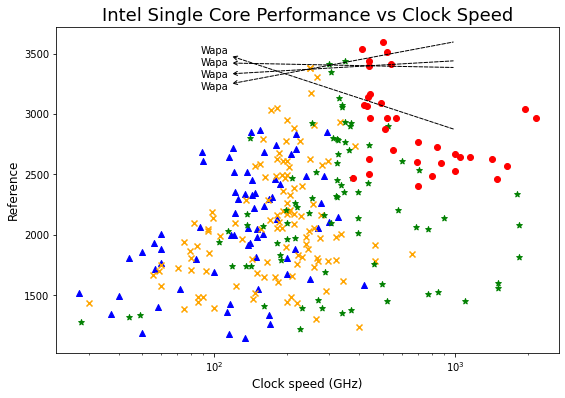

In [ ]:
marks = ["^","x","*","o"]
color = ['b','orange','g','r']
h=0
plt.figure(figsize=(9,6))
for i in [3,5,7,9]:
  plt.scatter(data = data[data.Label==i],x = 'Price ($)', y = 'Reference',
                  c = color[i - 3 - h], cmap = "cool",marker = marks[i - 3 - h], label = 'Core i'+str(i))
  plt.annotate( 'Wapa', xy=(1000, int(data[data.Label==i].Reference.max())), xytext=(100,3500-h*100), ha='center', #\
            arrowprops={'arrowstyle': '<-', 'ls': 'dashed'})
  h = h + 1
plt.title("Intel Single Core Performance vs Clock Speed", size=18)
plt.xlabel('Clock speed (GHz)', size=12)
plt.xscale('log')
plt.ylabel('Reference', size=12)
plt.show()